# Import Dataset

In [1]:
import pandas as pd

# File paths for the uploaded datasets
file_paths = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# Analyzing the structure of each dataset
analysis_results = {}

for path in file_paths:
    # Read dataset
    data = pd.read_csv(path)
    # Capture insights
    analysis_results[path] = {
        "Number of Rows": data.shape[0],
        "Number of Columns": data.shape[1],
        "Data Types": data.dtypes.to_dict(),
        "Missing Values": data.isnull().sum().to_dict(),
        "Sample Values": data.head(3).to_dict(orient="records")
    }

# Displaying the summarized results for user
analysis_results


{'PRSA_Data_Aotizhongxin_20130301-20170228.csv': {'Number of Rows': 35064,
  'Number of Columns': 18,
  'Data Types': {'No': dtype('int64'),
   'year': dtype('int64'),
   'month': dtype('int64'),
   'day': dtype('int64'),
   'hour': dtype('int64'),
   'PM2.5': dtype('float64'),
   'PM10': dtype('float64'),
   'SO2': dtype('float64'),
   'NO2': dtype('float64'),
   'CO': dtype('float64'),
   'O3': dtype('float64'),
   'TEMP': dtype('float64'),
   'PRES': dtype('float64'),
   'DEWP': dtype('float64'),
   'RAIN': dtype('float64'),
   'wd': dtype('O'),
   'WSPM': dtype('float64'),
   'station': dtype('O')},
  'Missing Values': {'No': 0,
   'year': 0,
   'month': 0,
   'day': 0,
   'hour': 0,
   'PM2.5': 925,
   'PM10': 718,
   'SO2': 935,
   'NO2': 1023,
   'CO': 1776,
   'O3': 1719,
   'TEMP': 20,
   'PRES': 20,
   'DEWP': 20,
   'RAIN': 20,
   'wd': 81,
   'WSPM': 14,
   'station': 0},
  'Sample Values': [{'No': 1,
    'year': 2013,
    'month': 3,
    'day': 1,
    'hour': 0,
    'PM2.5

# Check for missing values

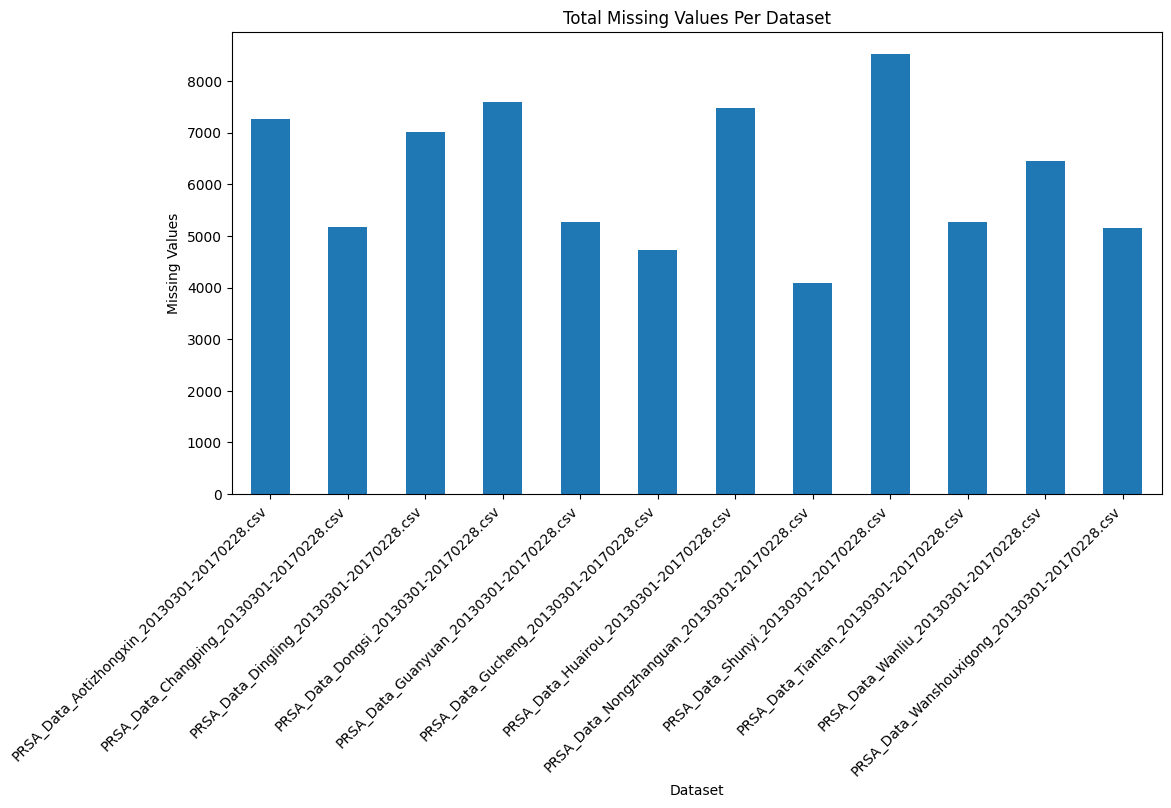

In [2]:
import matplotlib.pyplot as plt

# Extracting missing values data
missing_values = {
    path.split("/")[-1]: pd.Series(data["Missing Values"]) for path, data in analysis_results.items()
}

# Creating a dataframe to visualize missing values
missing_df = pd.DataFrame(missing_values).T

# Plotting missing values for each dataset
missing_df.sum(axis=1).plot(
    kind="bar", figsize=(12, 6), title="Total Missing Values Per Dataset", xlabel="Dataset", ylabel="Missing Values"
)
plt.xticks(rotation=45, ha="right")
plt.show()


# Merge and Pre Process Data

In [3]:
# Initialize an empty dataframe for merging
merged_data = pd.DataFrame()

# Read and merge all datasets
for path in file_paths:
    data = pd.read_csv(path)
    merged_data = pd.concat([merged_data, data], ignore_index=True)
    
# Data Preprocessing
# 1. Handle missing values
merged_data = merged_data.dropna(how="any")

# 2. Remove duplicate entries
merged_data = merged_data.drop_duplicates()

# 3. Feature engineering: Creating a combined datetime column
merged_data['datetime'] = pd.to_datetime(
    merged_data[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d-%H'
)

# 4. Dropping unnecessary columns
merged_data = merged_data.drop(columns=['year', 'month', 'day', 'hour'])

# General insights about the preprocessed dataset
general_insights = {
    "Number of Rows": merged_data.shape[0],
    "Number of Columns": merged_data.shape[1],
    "Data Types": merged_data.dtypes.to_dict(),
    "Missing Values Per Column": merged_data.isnull().sum().to_dict(),
    "Sample Values": merged_data.head(3).to_dict(orient="records"),
}

# Displaying general insights
print("\n--- General Insights About the Preprocessed Dataset ---")
for key, value in general_insights.items():
    print(f"{key}:\n{value}\n")


--- General Insights About the Preprocessed Dataset ---
Number of Rows:
382168

Number of Columns:
15

Data Types:
{'No': dtype('int64'), 'PM2.5': dtype('float64'), 'PM10': dtype('float64'), 'SO2': dtype('float64'), 'NO2': dtype('float64'), 'CO': dtype('float64'), 'O3': dtype('float64'), 'TEMP': dtype('float64'), 'PRES': dtype('float64'), 'DEWP': dtype('float64'), 'RAIN': dtype('float64'), 'wd': dtype('O'), 'WSPM': dtype('float64'), 'station': dtype('O'), 'datetime': dtype('<M8[ns]')}

Missing Values Per Column:
{'No': 0, 'PM2.5': 0, 'PM10': 0, 'SO2': 0, 'NO2': 0, 'CO': 0, 'O3': 0, 'TEMP': 0, 'PRES': 0, 'DEWP': 0, 'RAIN': 0, 'wd': 0, 'WSPM': 0, 'station': 0, 'datetime': 0}

Sample Values:
[{'No': 1, 'PM2.5': 4.0, 'PM10': 4.0, 'SO2': 4.0, 'NO2': 7.0, 'CO': 300.0, 'O3': 77.0, 'TEMP': -0.7, 'PRES': 1023.0, 'DEWP': -18.8, 'RAIN': 0.0, 'wd': 'NNW', 'WSPM': 4.4, 'station': 'Aotizhongxin', 'datetime': Timestamp('2013-03-01 00:00:00')}, {'No': 2, 'PM2.5': 8.0, 'PM10': 8.0, 'SO2': 4.0, 'NO2': 

In [4]:
# Dropping rows with any NaN values in the merged dataset
merged_cleaned_data = merged_data.dropna(how="any")

# Displaying basic information about the merged and cleaned dataset
merged_summary = {
    "Total Rows (Before Cleaning)": merged_data.shape[0],
    "Total Rows (After Cleaning)": merged_cleaned_data.shape[0],
    "Total Columns": merged_cleaned_data.shape[1],
    "Missing Values (After Cleaning)": merged_cleaned_data.isnull().sum().sum(),
}

# Statistical summary of the cleaned dataset
cleaned_merged_stats = merged_cleaned_data.describe(include="all").transpose()

# Output results
print("\n--- Merged Dataset Summary ---")
for key, value in merged_summary.items():
    print(f"{key}: {value}")

print("\n--- Statistical Summary of Cleaned Merged Dataset ---")
print(cleaned_merged_stats.to_string())


--- Merged Dataset Summary ---
Total Rows (Before Cleaning): 382168
Total Rows (After Cleaning): 382168
Total Columns: 15
Missing Values (After Cleaning): 0

--- Statistical Summary of Cleaned Merged Dataset ---
             count unique           top   freq                           mean                  min                  25%                  50%                  75%                  max           std
No        382168.0    NaN           NaN    NaN                    17955.93107                  1.0               9610.0              18103.0              26515.0              35064.0  10001.787087
PM2.5     382168.0    NaN           NaN    NaN                      79.432383                  2.0                 20.0                 55.0                111.0                844.0     80.154901
PM10      382168.0    NaN           NaN    NaN                     104.573837                  2.0                 36.0                 82.0                145.0                999.0     91.379446

# Visualize preprocessed data

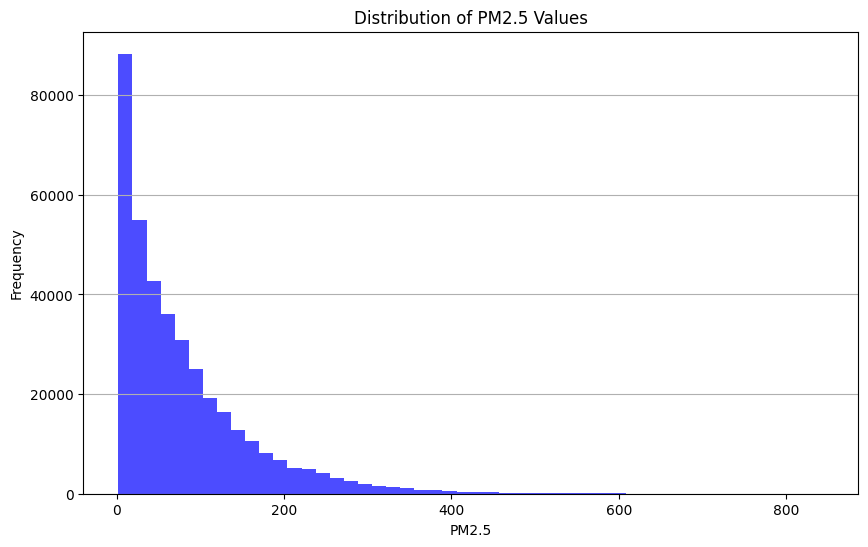

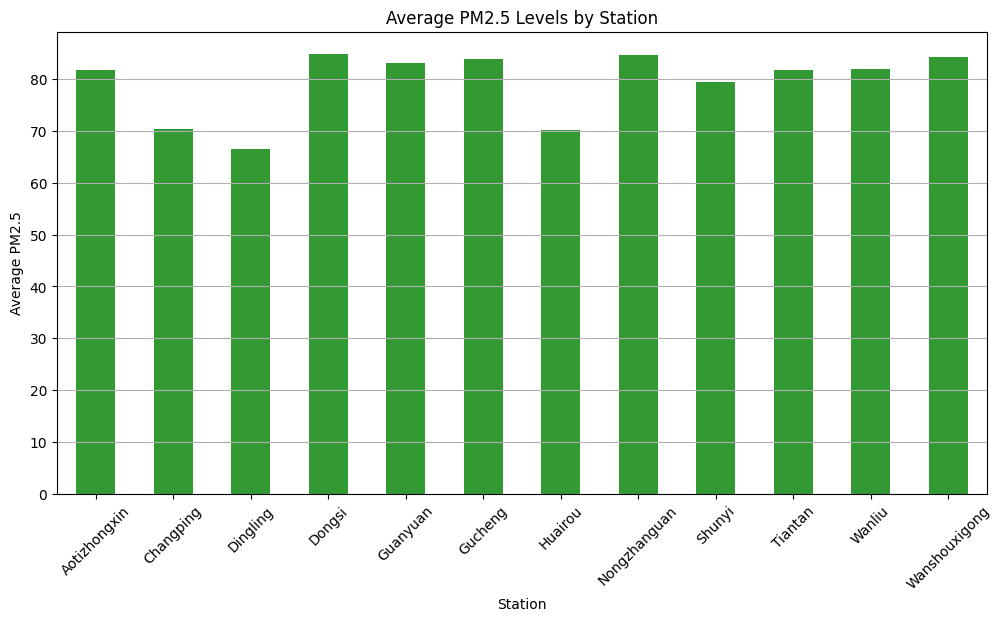

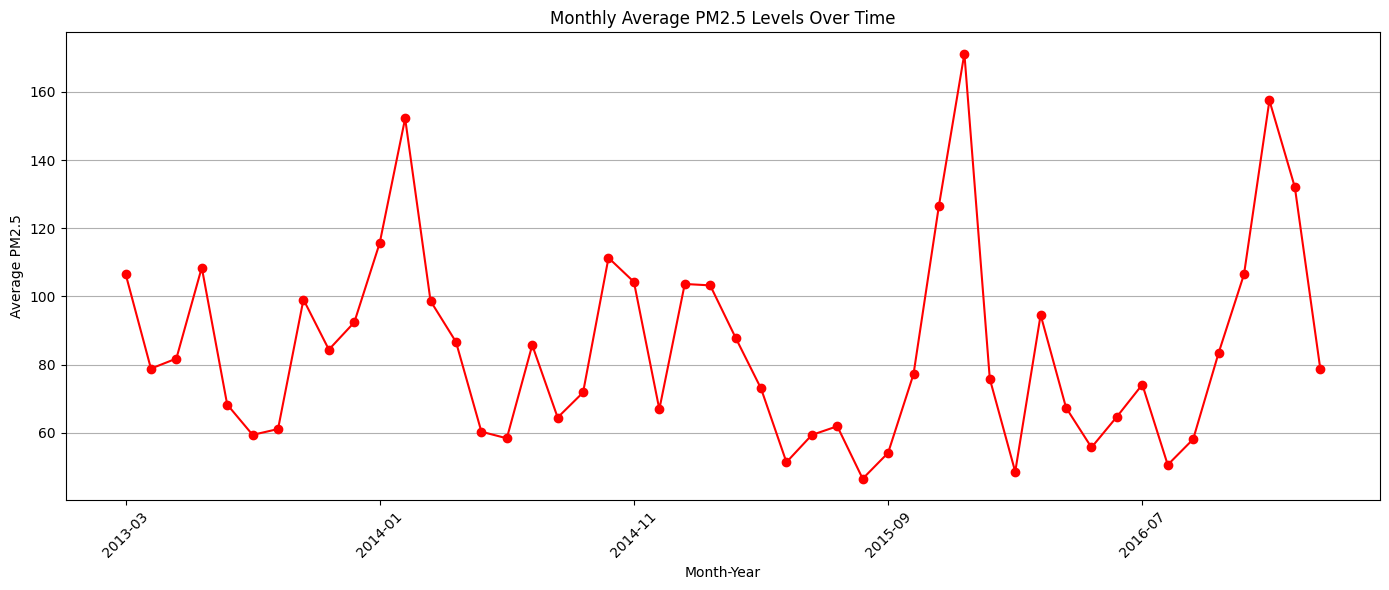

In [5]:
# Visualizations for insights
# 1. Distribution of PM2.5 values
plt.figure(figsize=(10, 6))
plt.hist(merged_cleaned_data['PM2.5'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of PM2.5 Values')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# 2. Average PM2.5 levels by station
average_pm25_by_station = merged_cleaned_data.groupby('station')['PM2.5'].mean()
plt.figure(figsize=(12, 6))
average_pm25_by_station.plot(kind='bar', color='green', alpha=0.8)
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Ensure the datetime column exists
if 'datetime' not in data.columns:
    data['datetime'] = pd.to_datetime(
        data[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1),
        format='%Y-%m-%d-%H'
    )

# Extract year and month from the datetime column
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month

# Create month-year column for grouping
data['month_year'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Compute monthly average PM2.5 levels
monthly_avg_pm25 = data.groupby('month_year')['PM2.5'].mean()

# Plotting
plt.figure(figsize=(14, 6))
monthly_avg_pm25.plot(kind='line', marker='o', color='red')
plt.title('Monthly Average PM2.5 Levels Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## Visualizing Univariate, Bivariate and Multivariate analysis

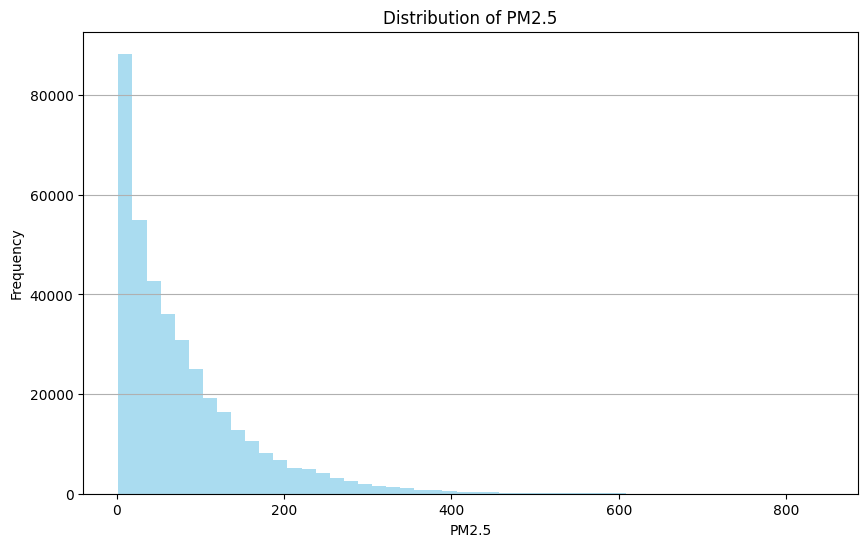

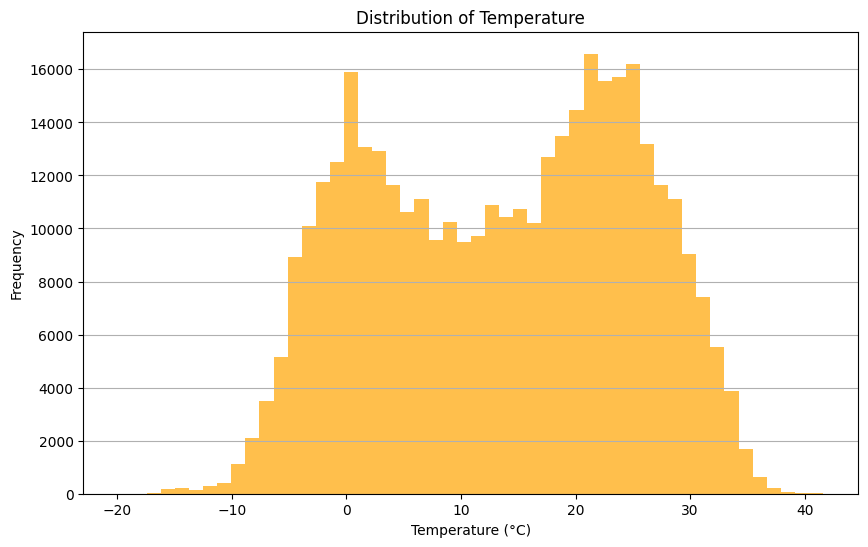

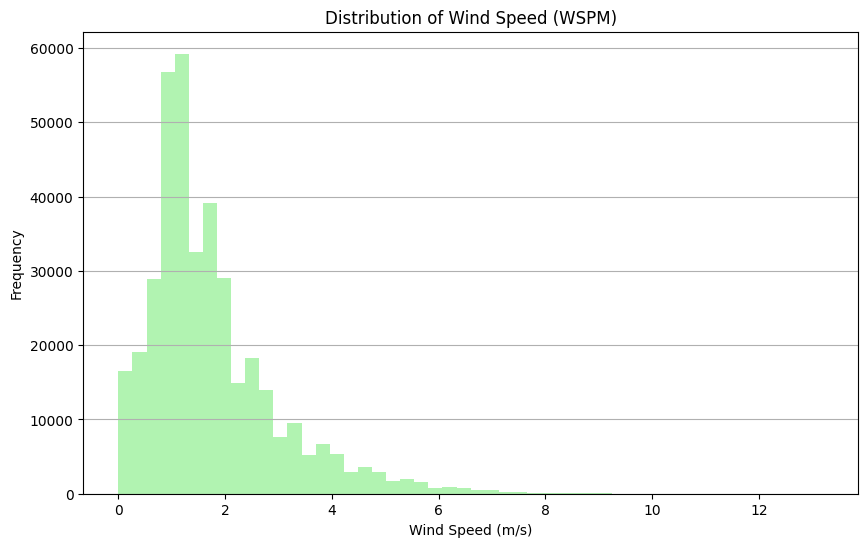

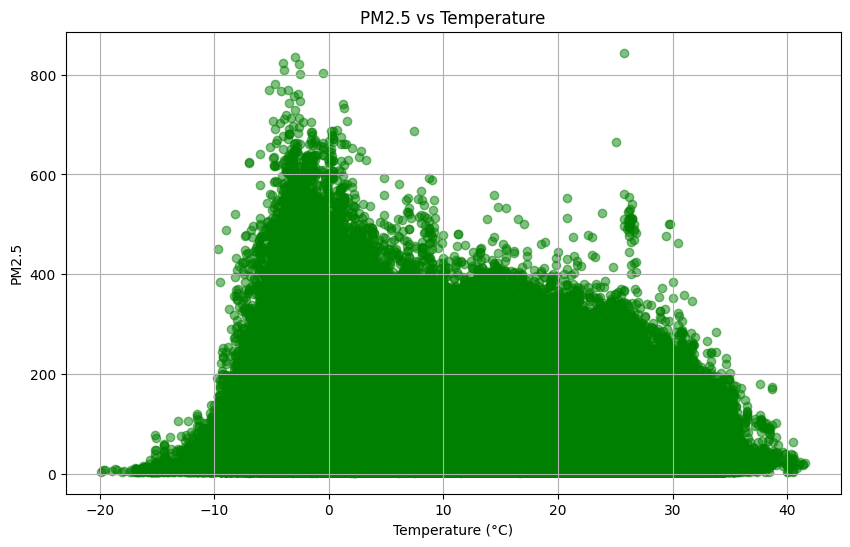

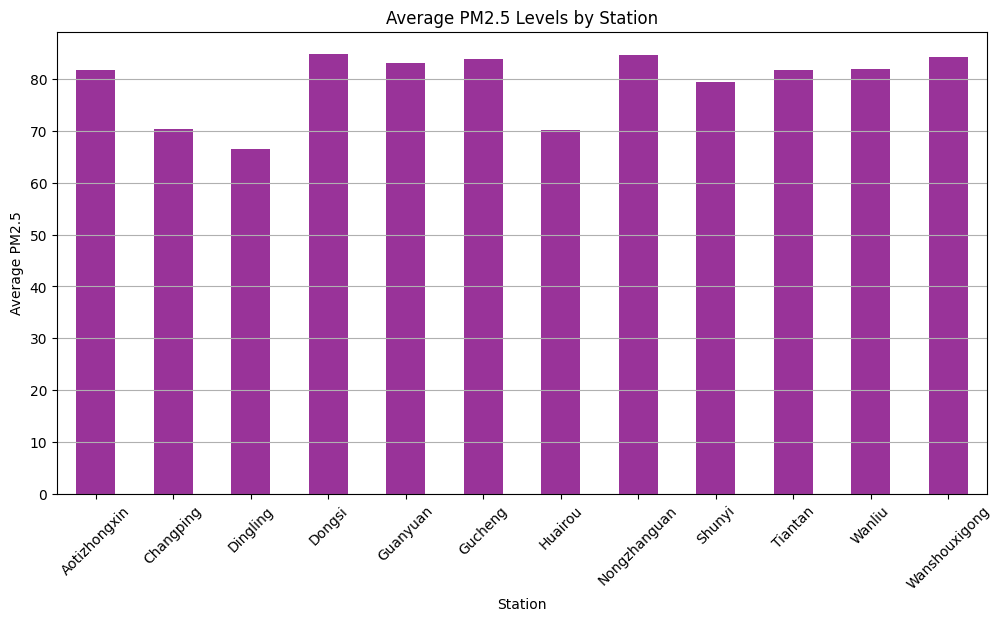

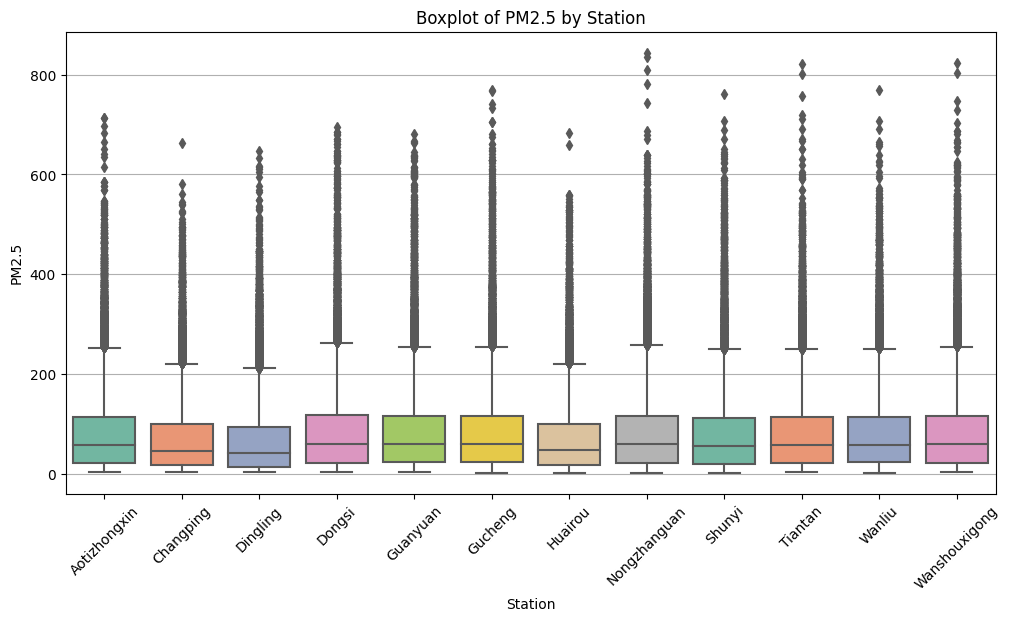

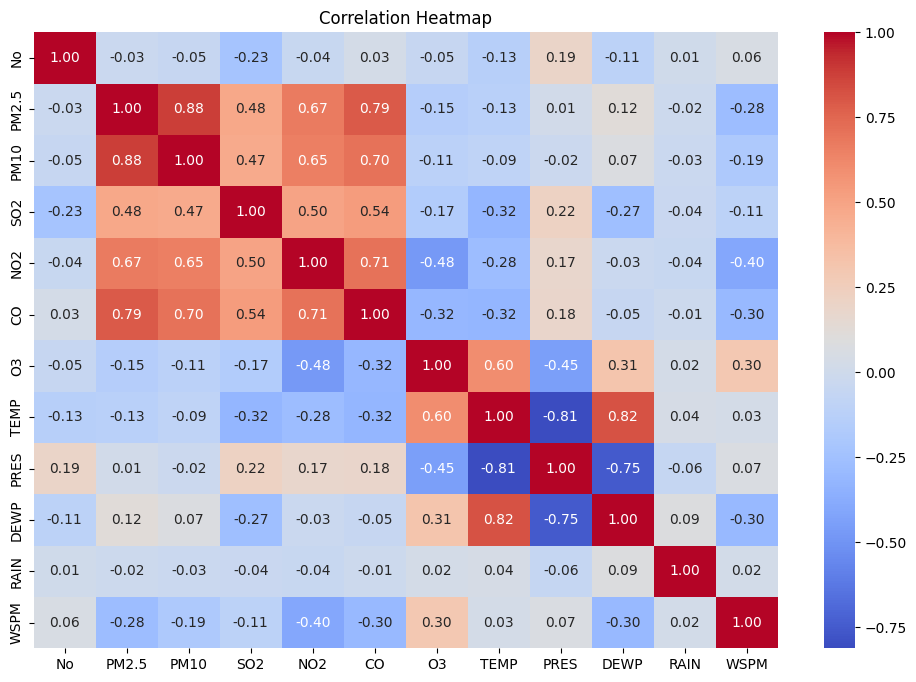

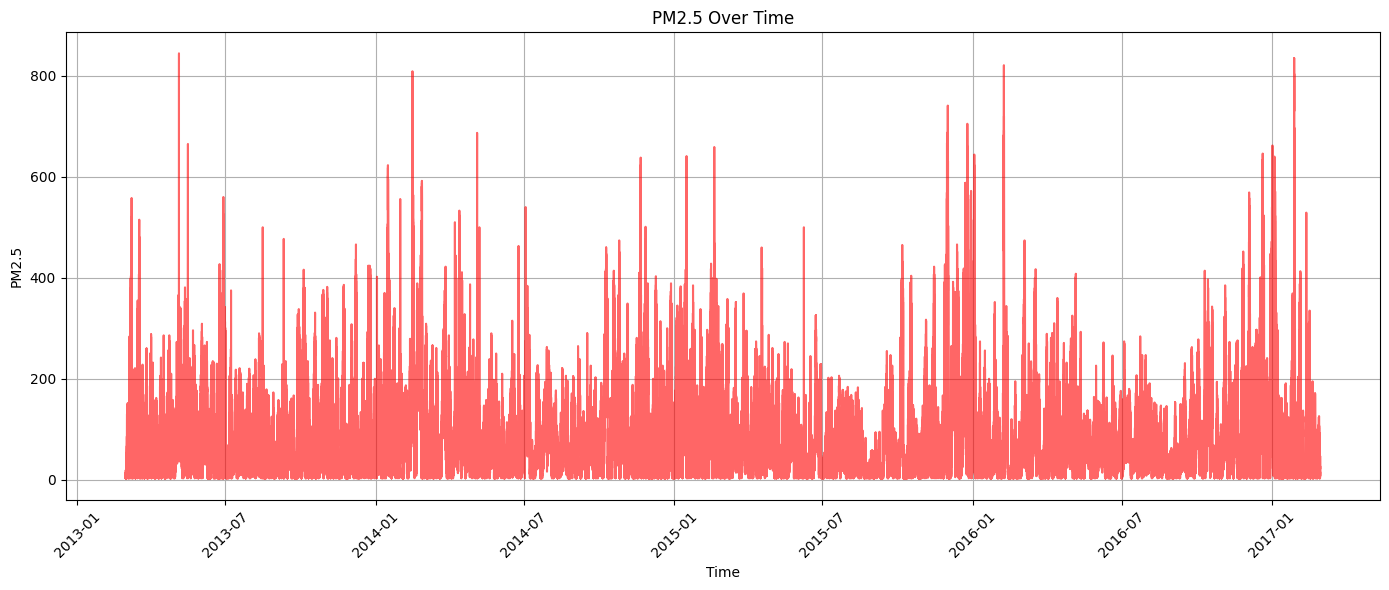

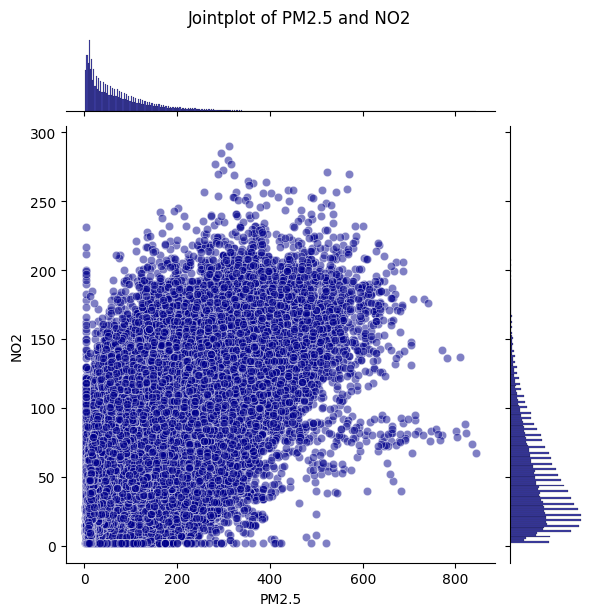

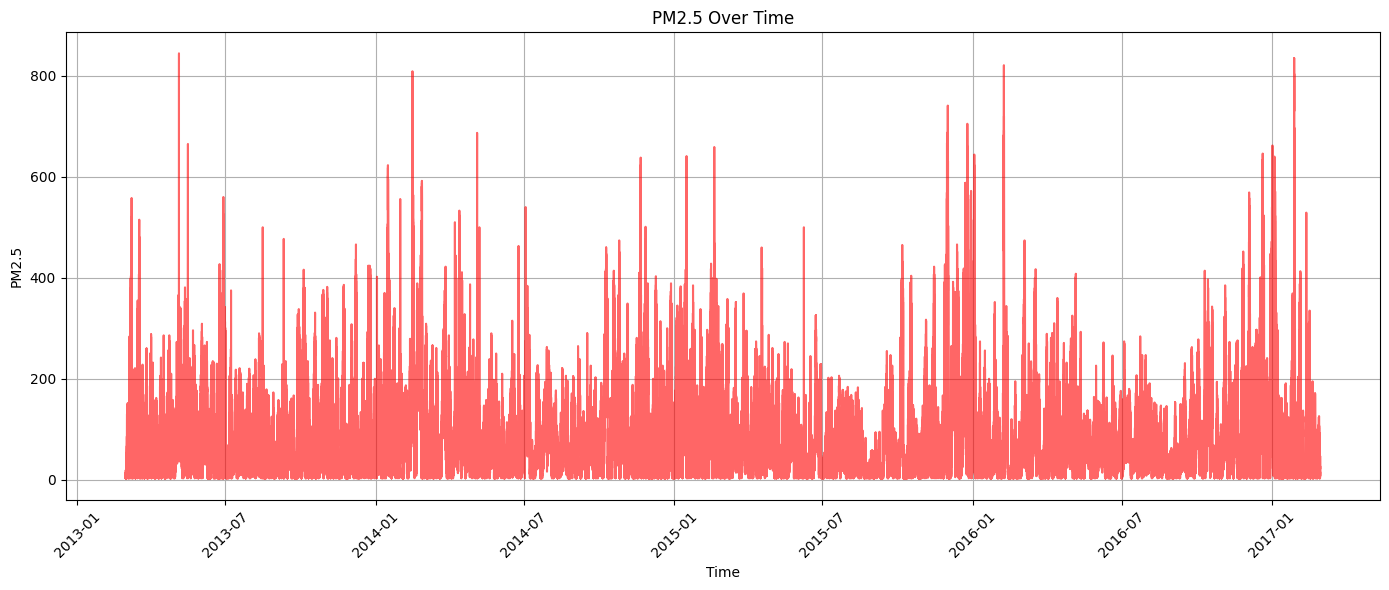

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
data = merged_cleaned_data

# Univariate Analysis
# 1. Distribution of PM2.5
plt.figure(figsize=(10, 6))
plt.hist(data['PM2.5'], bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# 2. Distribution of Temperature
plt.figure(figsize=(10, 6))
plt.hist(data['TEMP'], bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# 3. Wind Speed Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['WSPM'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Distribution of Wind Speed (WSPM)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Bivariate Analysis
# 1. Scatter plot between PM2.5 and Temperature
plt.figure(figsize=(10, 6))
plt.scatter(data['TEMP'], data['PM2.5'], alpha=0.5, color='green')
plt.title('PM2.5 vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5')
plt.grid()
plt.show()

# 2. Average PM2.5 by Station
avg_pm25_by_station = data.groupby('station')['PM2.5'].mean()
plt.figure(figsize=(12, 6))
avg_pm25_by_station.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Boxplot of PM2.5 by Station
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM2.5', data=data, palette='Set2')
plt.title('Boxplot of PM2.5 by Station')
plt.xlabel('Station')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Multivariate Analysis
# 1. Correlation Heatmap
# Filter numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


# 2. Line chart of PM2.5 over time
plt.figure(figsize=(14, 6))
data.sort_values('datetime', inplace=True)
plt.plot(data['datetime'], data['PM2.5'], color='red', alpha=0.6)
plt.title('PM2.5 Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Jointplot of PM2.5 and NO2
sns.jointplot(x='PM2.5', y='NO2', data=data, kind='scatter', alpha=0.5, color='darkblue')
plt.suptitle('Jointplot of PM2.5 and NO2', y=1.02)
plt.show()



# Plot PM2.5 over time
plt.figure(figsize=(14, 6))
plt.plot(data['datetime'], data['PM2.5'], color='red', alpha=0.6)
plt.title('PM2.5 Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# Model Development

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the preprocessed dataset
data = merged_cleaned_data

# Feature Engineering
# Ensure the datetime column exists
if 'datetime' not in data.columns:
    data['datetime'] = pd.to_datetime(
        data[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1),
        format='%Y-%m-%d-%H'
    )

# Drop unused columns
data = data.drop(columns=['datetime', 'station', 'wd'])

# Define features and target variable
X = data.drop(columns=['PM2.5'])
y = data['PM2.5']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [8]:
# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [9]:
# Train Random Forest Model with customized parameters
forest = RandomForestRegressor(n_estimators=100,
                                max_depth=7,
                                max_features='sqrt',
                                min_samples_split=7,
                                min_samples_leaf=3,
                                random_state=42)
forest.fit(X_train_preprocessed, y_train)

# Predictions
forest_y_pred = forest.predict(X_test_preprocessed)

# Evaluate the model
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

print("Random Forest - MSE:", forest_mse, "R2:", forest_r2)

Random Forest - MSE: 662.507992225003 R2: 0.8958928512778381


In [10]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)

# Predictions
linear_y_pred = linear_model.predict(X_test_preprocessed)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print("Linear Regression - MSE:", linear_mse, "R2:", linear_r2)


Linear Regression - MSE: 927.0020405310931 R2: 0.8543299998914703


In [11]:
# Visualization of Model Performance
model_names = ['Random Forest', 'Linear Regression']
mse_scores = [forest_mse, linear_mse ]
r2_scores = [forest_r2, linear_r2]

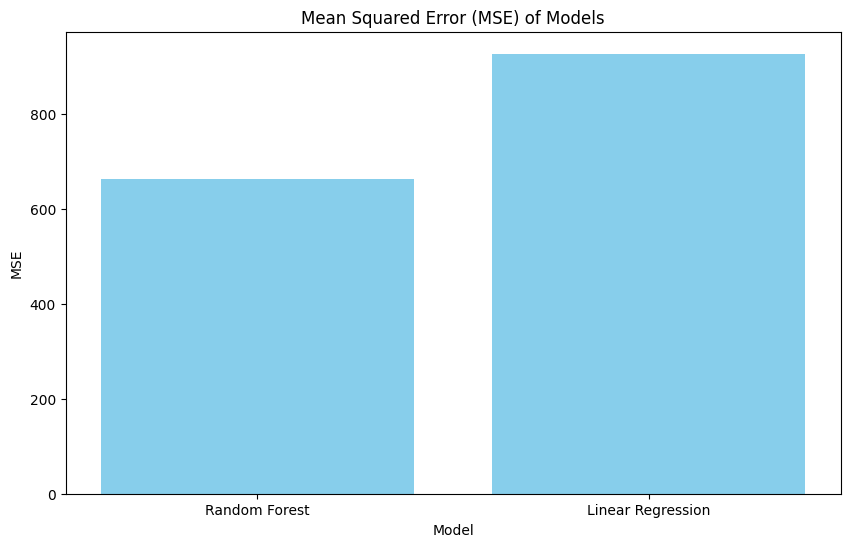

In [12]:
# Bar plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE) of Models')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()

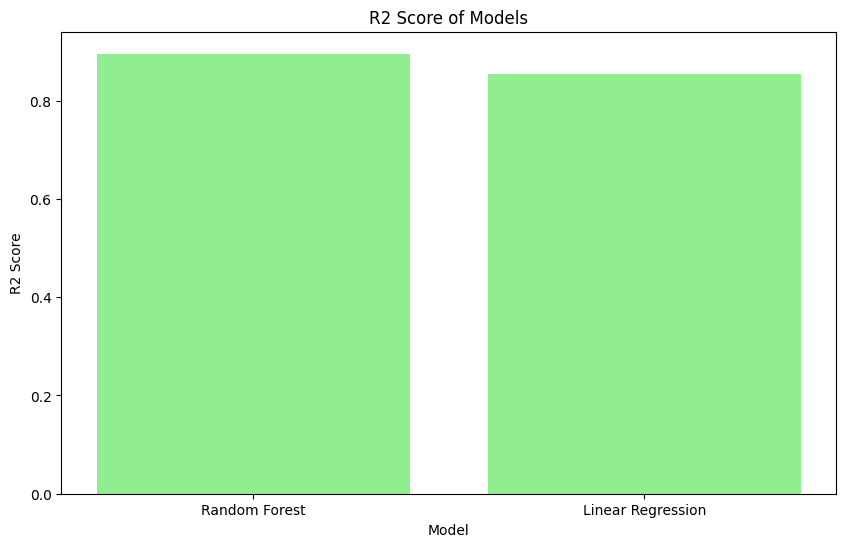

In [13]:

# Bar plot for R2 Score
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title('R2 Score of Models')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.show()